In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Part 1
A.)[2 pts]
1. Create an array with 200 elements from 1 to 200 in order.
2. Create a line plot to visualize this array of 200 elements

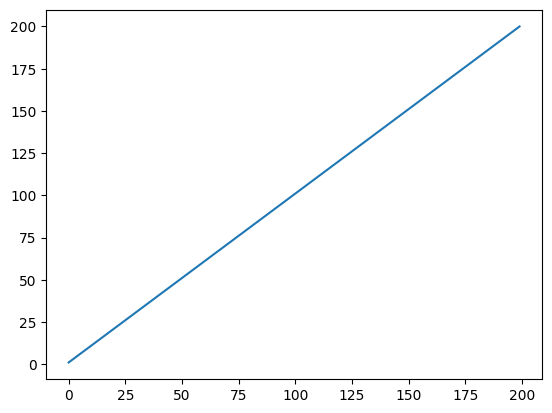

In [2]:
data = [i for i in range(1, 201)]
plt.figure()
plt.plot(data)
plt.show()

B.)[10 pts]
1. Create an array x with 10,000 floats in the range [1,10].
2. Plot, for the array x, a histogram showing a uniform distribution of bin sizes (similar to the figure shown below) (optional: use “rwidth” in plt.hist to create space between bins, see matplotlib documentation for details).
3. For the same array x, plot a histogram showing a monotonically increasing distribution of bin sizes.
4. For the same array x, plot a histogram showing a monotonically decreasing distribution of bin sizes.
5. Which of the histograms you created before can be considered a misleading visualizations, and why?  
    The last two are misleading because we are manupulating the binsize to change the visualization and not explicitly 
    telling the viewer.

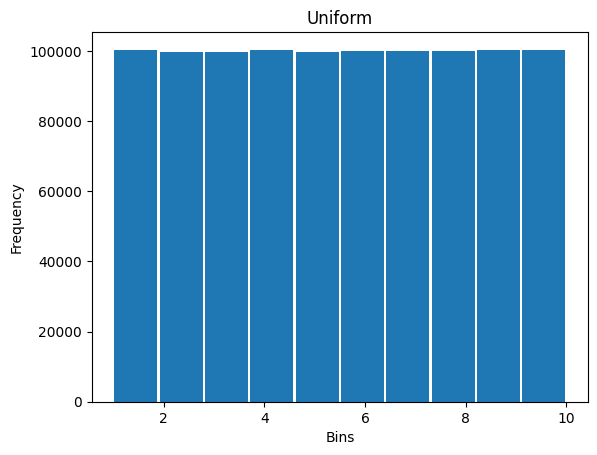

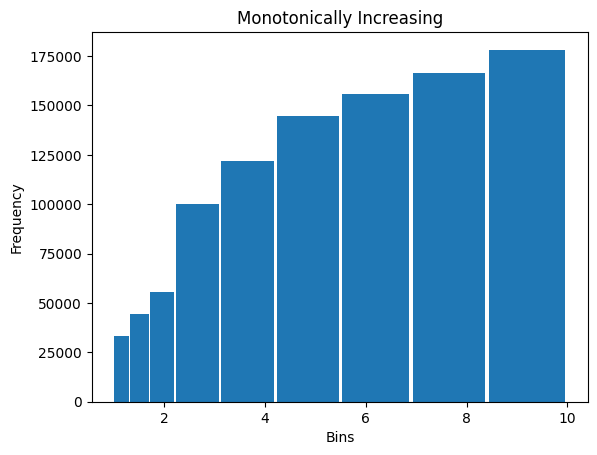

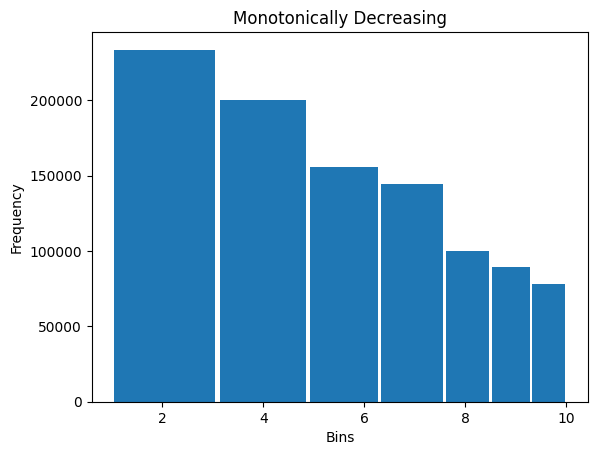

In [3]:
x = np.random.uniform(1,10,1000000)

plt.figure()
plt.title('Uniform')
plt.hist(x, rwidth=.95)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title('Monotonically Increasing')
bins = [1, 1.3, 1.7, 2.2, 3.1, 4.2, 5.5, 6.9, 8.4,  10]
plt.hist(x, bins=bins, rwidth = .95)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title('Monotonically Decreasing')
bins = [1, 3.1, 4.9, 6.3, 7.6, 8.5, 9.3, 10]
plt.hist(x, bins=bins, rwidth = .95)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()



C.)[8 pts]
1. Create an array by generating 100 random numbers with normal (aka Gaussian) distribution.
2. Write the numbers out to a binary file (using numpy). Read the binary file back into an array (using numpy).
3. Create a histogram and a bar chart of the data you read back from the binary file.
4. What information does the histogram shows that the bar chart does not?  
    Histograms show the values that are most likely to occur.
5. What information does the bar chart shows that the histogram does not?  
    Bar charts show the actual values of each of the elements in the array.

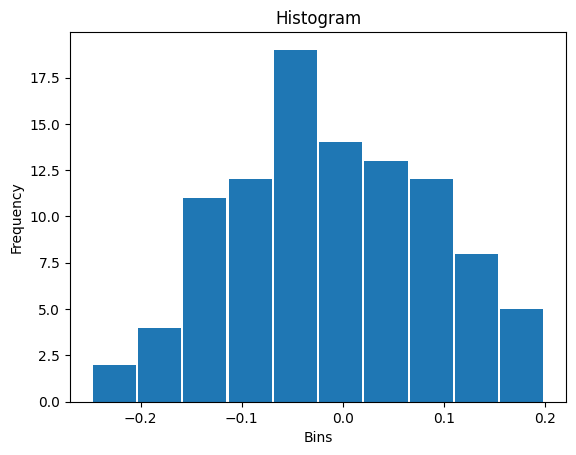

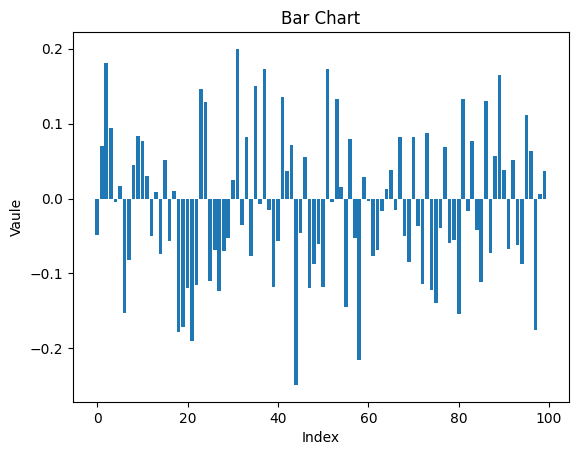

In [4]:
data = np.random.normal(0,.1,100)
np.save("data.npy", data)
data = np.load("data.npy")

plt.figure()
plt.title('Histogram')
plt.hist(data, 10, rwidth=.95)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title('Bar Chart')
plt.bar(range(len(data)), data)
plt.xlabel("Index")
plt.ylabel("Vaule")
plt.show()


Part 2
A.)[8 pts] Download the NOAA Land Ocean Temperature Anomalies Data Set Download NOAA Land Ocean Temperature Anomalies Data Set. Load the data.
1. Create a Scatter Plot and a Bar Plot. Include a label called “Year” along the x-axis and a label called “Degrees Celsius +/- From Average” along the y-axis.
2. Describe the trends you see in the data.  
    There is a decrese in temperature from 1880 to about 1910 and from there the temperature trends upward.
3. Discuss which plot you believe shows those trends better and why.  
    Overall I think the scatter plot is more effective because at a quick glance you can see the general trend of the data 
    much easier.
4. Provide an example of a different plot which better represents the long-term trends.  
    A line graph represents the long-term trends better because it has all the benefits of the scatter plot with the 
    added benefit of being more clear and concise.

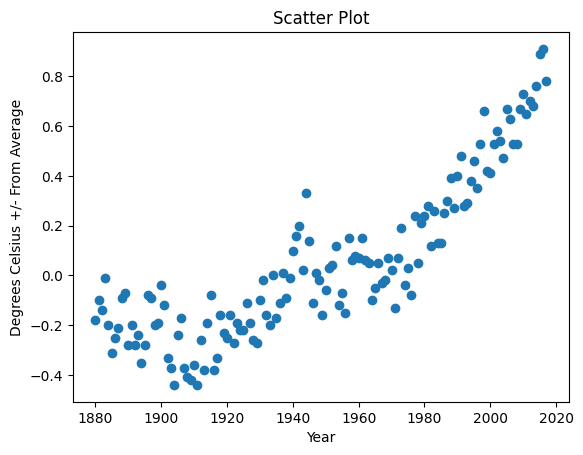

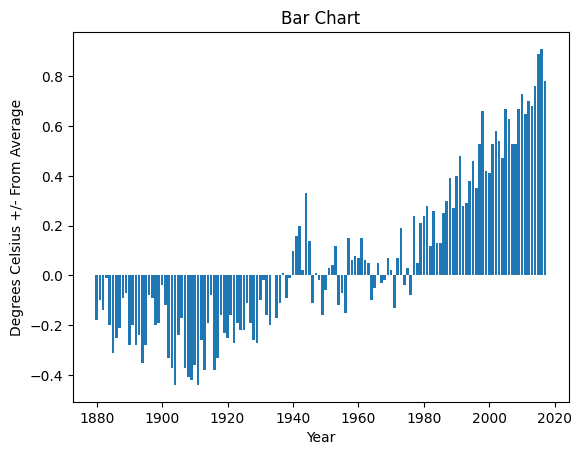

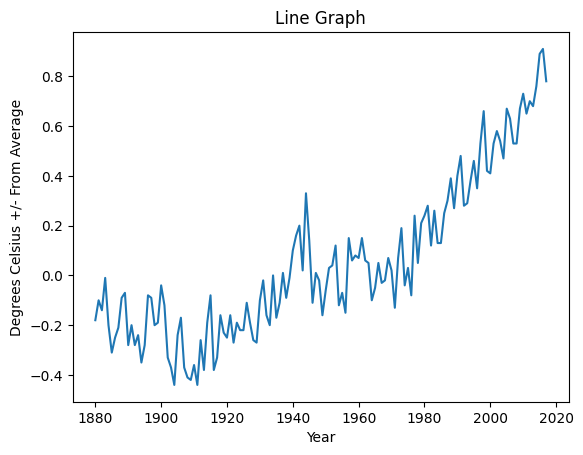

In [5]:
data = np.genfromtxt(fname="NOAA-Temperatures.csv", skip_header=4, delimiter=",", names=True)
x = data["Year"]
y = data["Value"]

plt.figure()
plt.title('Scatter Plot')
plt.xlabel("Year")
plt.ylabel("Degrees Celsius +/- From Average")
plt.scatter(x,y)
plt.show()

plt.figure()
plt.title('Bar Chart')
plt.xlabel("Year")
plt.ylabel("Degrees Celsius +/- From Average")
plt.bar(x,y)
plt.show()

plt.figure()
plt.title('Line Graph')
plt.xlabel("Year")
plt.ylabel("Degrees Celsius +/- From Average")
plt.plot(x,y)
plt.show()


B.)[8 pts] Download the statistical data about marriage from: https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/both_sexes.csv Links to an external site.. Read carefully the description of the dataset on the webpage. Load the data.
1. Create a Star Plot (polar plot) and a Line Graph using at least three fields.
2. Describe the trends you see in the plots for the three different fields.  
    The percent of familes that are poor steadily increases as the years go on. 
3. What are some pros and cons of using a Star Plot vs a Line Graph?  
    The Star Plot seems to show the change between lines a bit better, but the line graph is much more intuitive to look at
    and gather something from the data.

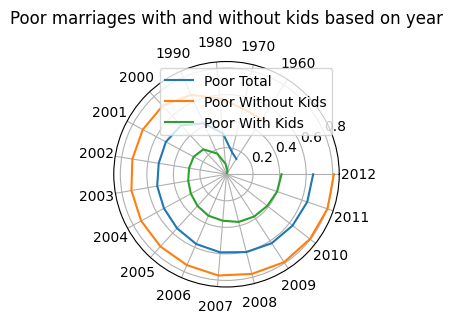

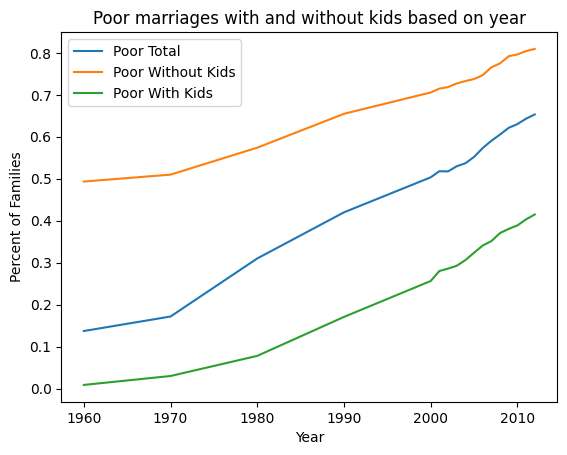

In [6]:
from math import pi

data = np.genfromtxt(fname="https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/both_sexes.csv", delimiter=",", dtype=None, names=True, encoding=None)

poor = data["poor_2534"]
noKids =data["nokids_poor_2534"]
kids = data["kids_poor_2534"]
year =data["year"]

plt.figure()
ax = plt.subplot(121, polar=True)
ticks = np.linspace(1, 2*pi, len(year))
plt.xticks(ticks, year)
plt.polar(ticks, poor)
# plt.fill(ticks, poor, 'y', alpha=.3)
plt.polar(ticks, noKids)
# plt.fill(ticks, noKids, 'p', alpha=.3)
plt.polar(ticks, kids)
# plt.fill(ticks, kids, 'r', alpha=.3)
plt.legend(['Poor Total', 'Poor Without Kids', 'Poor With Kids'])
ax.set_title("Poor marriages with and without kids based on year", va='bottom')
plt.show()

plt.figure()
plt.title('Poor marriages with and without kids based on year')
plt.plot(year, poor)
plt.plot(year, noKids)
plt.plot(year, kids)
plt.legend(['Poor Total', 'Poor Without Kids', 'Poor With Kids'])
plt.xlabel("Year")
plt.ylabel("Percent of Families")
plt.show()


C.)[6 pts] Download the U.S. Birth data set: https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv Links to an external site.. Load the data.
Create visualizations to support your answers for the following questions:

1. What month had the highest number of births?  
    September had the most births.
2. What month had the lowest number of births?  
    April had the fewest births.
3. Are there any interesting trends in the data?  
    The number of births trends up intil september were there is a sharp decline followed by an upward trend again.

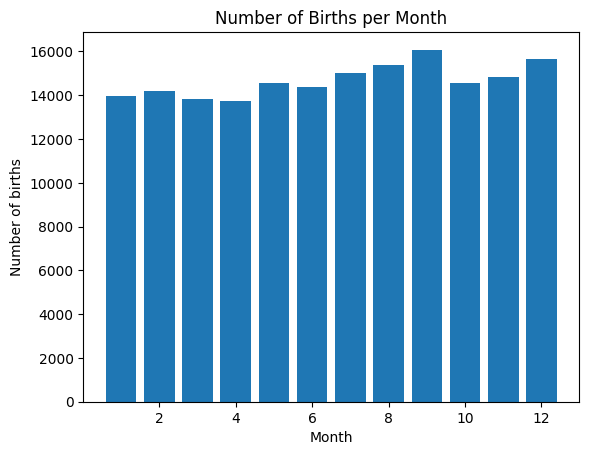

In [7]:
data = np.genfromtxt(fname="https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv", delimiter=",", dtype=None, names=True, encoding=None)

plt.figure()
plt.title('Number of Births per Month')
month = data['month']
births = data['births']
plt.bar(month, births)
plt.xlabel('Month')
plt.ylabel('Number of births')
plt.show()

D.)[18 pts] Five Thirty Eight maintains a server with many interesting datasets: https://github.com/fivethirtyeight/data Links to an external site.. Choose 1 data set and:

1. Produce three good visualizations which convey a unique trend in the data. Discuss the trends you see briefly.  
    Pain releivers take up almost half of the general hard drug use. Hard drug use is most common in your 20's except for 
    inhalents which are more popular for people in their teens. Use of Alcohol seems to almost platue after 21 and there is
    only a really large change after age 50.

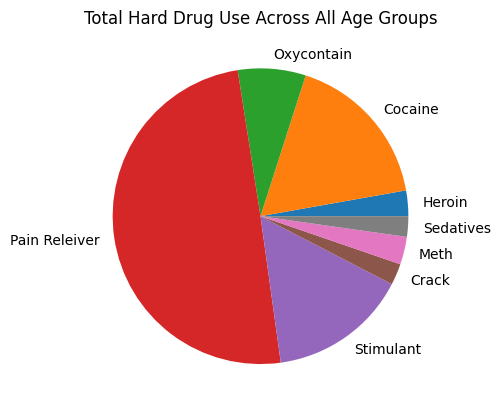

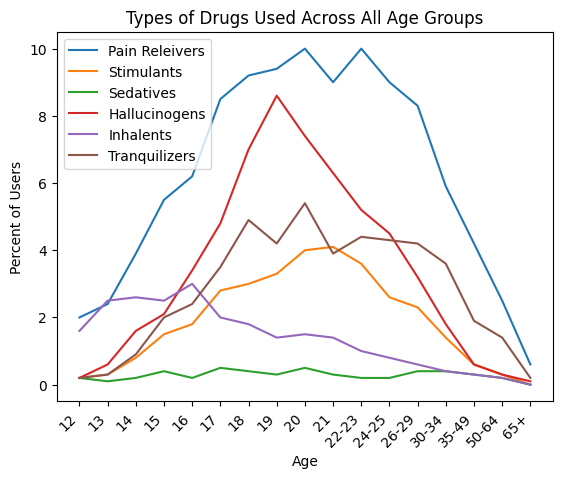

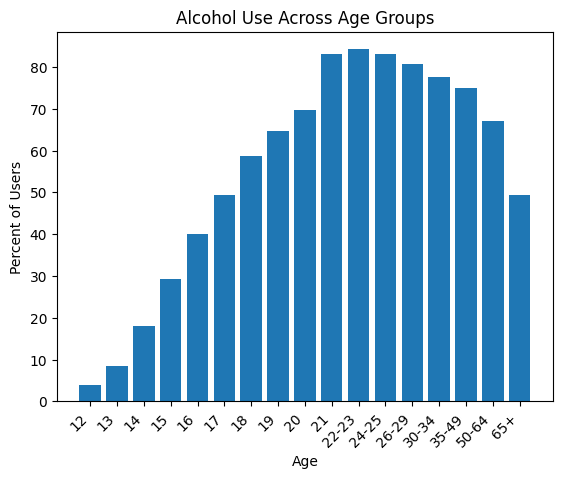

In [8]:
data = np.genfromtxt(fname="https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv", delimiter=",", dtype=None, names=True, encoding=None)

age=data["age"]
heroin=data["heroin_use"]
cocaine = data["cocaine_use"]
alcohol=data["alcohol_use"]
marijuana=data["marijuana_use"]
oxycontin=data["oxycontin_use"]
crack = data["crack_use"]
meth = data["meth_use"]

painReleiver = data["pain_releiver_use"]
stimulant = data["stimulant_use"]
sedatives = data["sedative_use"]
hallucinogen = data["hallucinogen_use"]
inhalent = data["inhalant_use"]
tranquilizer = data["tranquilizer_use"]

# total hard drug use across all age groups
labels = ['Heroin', 'Cocaine', 'Oxycontain', 'Pain Releiver', 'Stimulant', 'Crack', 'Meth', 'Sedatives']
data = [sum(heroin), sum(cocaine), sum(oxycontin), sum(painReleiver), sum(stimulant), sum(crack), sum(meth), sum(sedatives)]
plt.figure()
plt.title('Total Hard Drug Use Across All Age Groups')
plt.pie(data, labels=labels)
plt.show()

# drug types used across age groups
plt.figure()
plt.title('Types of Drugs Used Across All Age Groups')
plt.plot(age, painReleiver)
plt.plot(age, stimulant)
plt.plot(age, sedatives)
plt.plot(age, hallucinogen)
plt.plot(age, inhalent)
plt.plot(age, tranquilizer)
plt.xticks(rotation=45, ha='right')
plt.legend(['Pain Releivers', 'Stimulants', 'Sedatives', 'Hallucinogens', 'Inhalents', 'Tranquilizers'])
plt.xlabel('Age')
plt.ylabel('Percent of Users')
plt.show()

# alcohol use across age groups
plt.figure()
plt.title('Alcohol Use Across Age Groups')
plt.bar(age, alcohol)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age')
plt.ylabel('Percent of Users')
plt.show()




2. Produce three bad visualizations and explain briefly why these visualizations are not suitable for the dataset you picked.  
    The first two figures are bad because all the non alcohol stats are squished by the size of the alcohol data. The third
    is bad because its very hard to tell the subtle differences between ages 16-65+

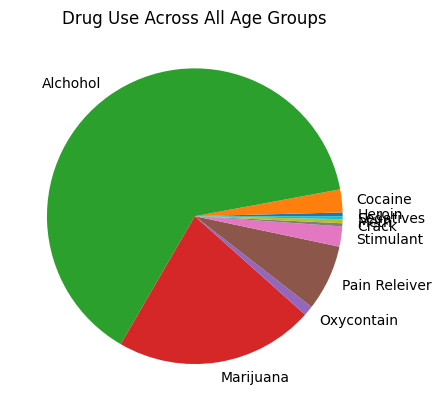

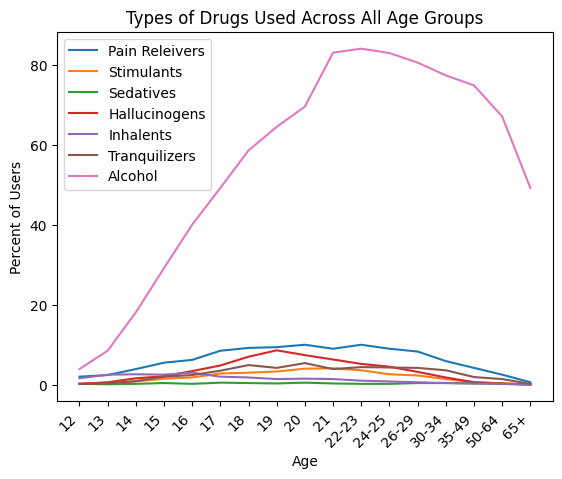

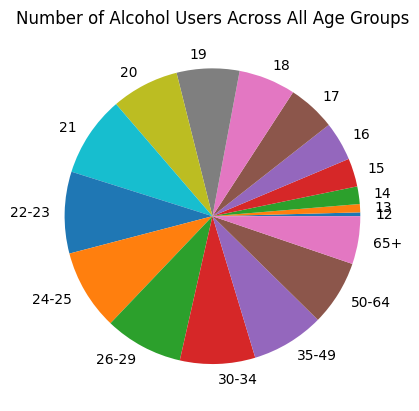

In [9]:
labels = ['Heroin', 'Cocaine', 'Alchohol', 'Marijuana', 'Oxycontain', 'Pain Releiver', 'Stimulant', 'Crack', 'Meth', 'Sedatives']
data = [sum(heroin), sum(cocaine), sum(alcohol), sum(marijuana), 
        sum(oxycontin), sum(painReleiver), sum(stimulant), sum(crack), sum(meth), sum(sedatives)]
plt.figure()
plt.title('Drug Use Across All Age Groups')
plt.pie(data, labels=labels)
plt.show()

plt.figure()
plt.title('Types of Drugs Used Across All Age Groups')
plt.plot(age, painReleiver)
plt.plot(age, stimulant)
plt.plot(age, sedatives)
plt.plot(age, hallucinogen)
plt.plot(age, inhalent)
plt.plot(age, tranquilizer)
plt.plot(age, alcohol)
plt.xticks(rotation=45, ha='right')
plt.legend(['Pain Releivers', 'Stimulants', 'Sedatives', 'Hallucinogens', 'Inhalents', 'Tranquilizers', 'Alcohol'])
plt.xlabel('Age')
plt.ylabel('Percent of Users')
plt.show()

labels = ['12','13','14','15','16','17','18','19','20','21','22-23','24-25','26-29','30-34','35-49','50-64','65+']
plt.figure()
plt.title('Number of Alcohol Users Across All Age Groups')
plt.pie(alcohol, labels=labels)
plt.show()

Part 3
A.)[16 pts] Python/Jupyter also can be used for analysis and visualization of 3D scalar field datasets, such as the brain MRI images.

1. Download the brain MRI dataset “T2.raw Download T2.raw.zip” from canvas, unzip it and load the file "T2.raw" into a numpy array. The data format is float32 with dimensions 320 x 320 x 256.
2. Extract one slice from the volume and save it as a PNG image.

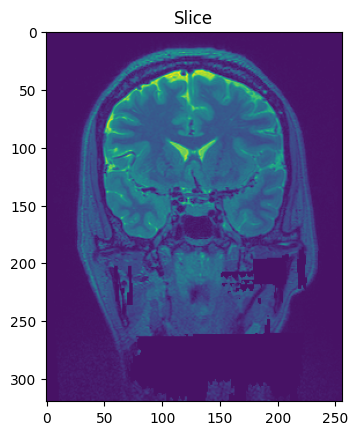

In [10]:
data = np.fromfile('T2.raw', dtype='float32')
data = data.reshape(320, 320, 256)

plt.figure()
plt.title('Slice')
plt.imshow(data[120,:,:])
plt.savefig('slice.png')
plt.show()

B.)[10 pts] Create a ipywidget slider to threshold the data for a given slice. For increasing threshold values, your output should look similar to the visualizations below (i.e., the figure shows only values in the data below the selected threshold value):

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

axis_widget=widgets.Dropdown(
    options=['x', 'y', 'z'], value='x', description='Axis:')
am = dict(x=0,y=1,z=2)

slice_widget=widgets.IntSlider(min=0, max=320, step=1, value=120)

def update_slice_max(n):
    slice_widget.max=data.shape[am[n]]-1

def show_slice(axis, slice_num):
    update_slice_max(axis)
    slice_num = slice_widget.value
    
    if axis == 'x':
      plt.imshow(data[slice_num,:,:])
    elif axis == 'y':
      plt.imshow(data[:,slice_num,:])
    elif axis == 'z':
      plt.imshow(data[:,:,slice_num])
    plt.title('Interactive Slice')
    plt.show()

plt.figure()
data = np.fromfile('T2.raw', dtype='float32')
data = data.reshape(320, 320, 256)
interact(show_slice, slice_num=slice_widget, axis=axis_widget)

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='Axis:', options=('x', 'y', 'z'), value='x'), IntSlider(value=120, …

<function __main__.show_slice(axis, slice_num)>

C.)[4 pts]

1. What is the topological dimensionality of this dataset?  
    This dataset has a topological dimensionality of 3D because it has 3 independent variables(x, y, and z).
2. What is the geometrical dimensionality of the visualization in B (the one in the picture above)?  
    This visualization has a geometrical dimensionality of 3 because it has 3 independent variables(x, y, and color).